In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import data
import gp2

In [3]:
import os

In [4]:
workingdir = '/tmp/tmpsbsac6t_GP2'

In [5]:
M = data.Manager.load(os.path.join(workingdir, 'M_step1.pickle'))

In [6]:
A_test = M.get('A_test')
A_test_pred = M.get('A_test_pred')
B = M.get('B')

In [7]:
# create C dataset where A_test is labeled as 1 and B is labeled as 0

In [8]:
A_test_images_only_, A_test_images_only_ids = A_test.to_array()
A_test_images_only_ = A_test_images_only_[:,:,:,0].astype(np.uint8)

In [9]:
A_test_pred_, A_test_pred_ids = A_test_pred.to_array()
A_test_pred_ = A_test_pred_.astype(np.uint8)

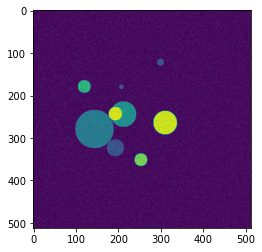

In [10]:
imshow(A_test_images_only_[10,:,:])

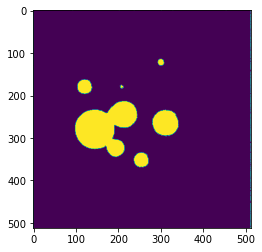

In [11]:
imshow(A_test_pred_[10,:,:])

In [12]:
A_test_with_pred_ = np.stack((A_test_images_only_, A_test_pred_[:,:,:,0]), axis=-1)

In [13]:
#
# CREATE C DATASET
#
B_, B_ids = B.to_array()
C_size = (2*B_.shape[0], B_.shape[1], B_.shape[2])
C_images_ = np.zeros((C_size+(B_.shape[3],)), dtype=B_.dtype)
C_images_[0:A_test_with_pred_.shape[0]] = A_test_with_pred_
C_images_[A_test_with_pred_.shape[0]:] = B_

C_labels_ = np.empty((C_size+(1,)), dtype=np.bool)
C_labels_[0:B_.shape[0],0,0,0] = 1
C_labels_[B_.shape[0]:,0,0,0] = 0


1


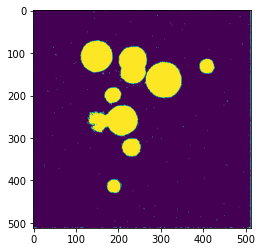

In [14]:
# machine label example
imshow(C_images_[200,:,:,1]),
print(int(C_labels_[200,0,0,0]))

0


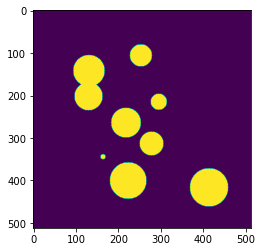

In [15]:
# expert label example
imshow(C_images_[300,:,:,1])
print(int(C_labels_[300,0,0,0]))

In [16]:
C_ = np.concatenate((C_images_, C_labels_), axis=-1)

In [17]:
C_.dtype

dtype('uint8')

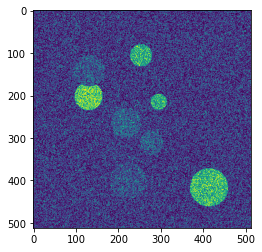

In [18]:
imshow(C_[300,:,:,0])

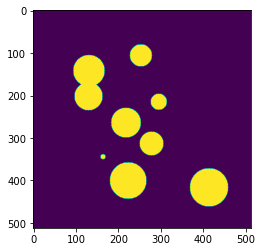

In [19]:
imshow(C_[300,:,:,1])

In [20]:
int(C_[300,0,0,2])

0

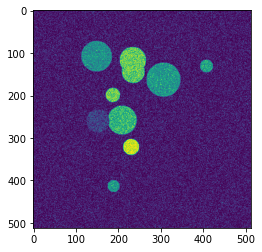

In [21]:
imshow(C_[200,:,:,0])

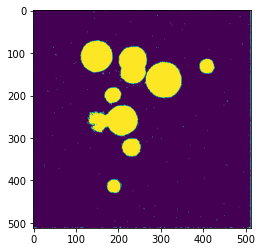

In [22]:
imshow(C_[200,:,:,1])

In [23]:
int(C_[200,0,0,2])

1

In [24]:
# combine the uniq ids from A_test_pred and B
C_ids = A_test_pred_ids + B_ids

In [25]:
A_test_pred_ids[100], C_ids[100], B_ids[401-250], C_ids[401]

('2ce6f05a-db6c-4378-95f3-e7d4df03a6fb',
 '2ce6f05a-db6c-4378-95f3-e7d4df03a6fb',
 'fd84503b-07a7-405e-8823-e4794a448180',
 'fd84503b-07a7-405e-8823-e4794a448180')

In [26]:
C = data.Collection.from_list(C_, C_ids)

In [27]:
M.register(C, 'C')

In [28]:
M.names

{'9b40feb6-d801-455d-9844-ce7699e8f4fd': 'A_train',
 'b2a16a66-060e-408a-8e17-506238300389': 'A_val',
 '176fcc4c-f45b-487e-a7ac-62010272d206': 'A_test',
 'b13780c8-e9b9-47bb-84ad-d91ce9155211': 'A_test_pred',
 '2834b7d4-9f72-4584-aedd-f866777290e3': 'B',
 'ba96acbc-9f10-445a-811c-75e845663aed': 'C'}

In [29]:
M.save(os.path.join(workingdir, 'M_step2.pickle'))